# Text and Annotation
Creating a good visualization involves guiding the reader so that the figure tells a
story. In some cases, this story can be told in an entirely visual manner, without the
need for added text, but in others, small textual cues and labels are necessary. Perhaps
the most basic types of annotations you will use are axes labels and titles, but the
options go beyond this. Let’s take a look at some data and how we might visualize and
annotate it to help convey interesting information.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [2]:
births = pd.read_csv('../data/births.csv')

quartiles = np.percentile(births['births'],[25,50,75])
mu, sig= quartiles[1], 0.74*(quartiles[2]-quartiles[0])
births=births.query('(births > @mu - 5*@sig)& (births<@mu + 5* @sig)')

births['day']=births['day'].astype(int)
births.index=pd.to_datetime(10000*births.year + 
                           100*births.month+
                           births.day, format="%Y%m%d")

births_by_date=births.pivot_table('births',
                                 [births.index.month, births.index.day])

births_by_date.index=[pd.datetime(2012, month, day) for (month, day) in births_by_date.index]


/tmp/ipykernel_132909/914953373.py:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index=[pd.datetime(2012, month, day) for (month, day) in births_by_date.index]


<AxesSubplot:>

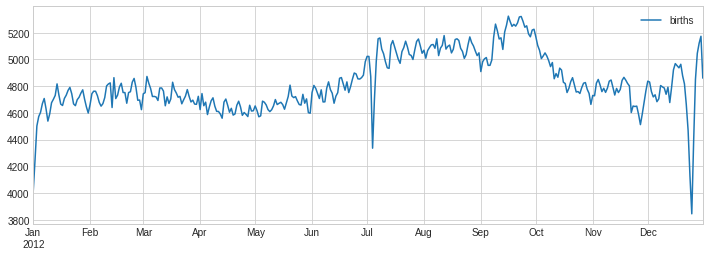

In [3]:
fig, ax=plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

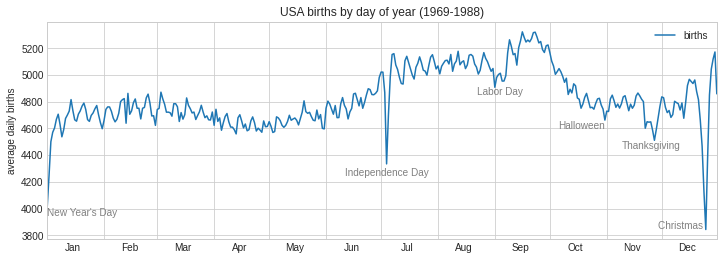

In [4]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
# Add labels to the plot
style = dict(size=10, color='gray')
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)
# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
ylabel='average daily births')
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

# Transforms and Text Position
In the previous example, we anchored our text annotations to data locations. Some‐
times it’s preferable to anchor the text to a position on the axes or figure, independent
of the data. In Matplotlib, we do this by modifying the transform.

Any graphics display framework needs some scheme for translating between coordinate systems. For example, a data point at x, y = 1, 1 needs to somehow be represented at a certain location on the figure, which in turn needs to be represented in pixels on the screen. 

Mathematically, such coordinate transformations are relatively straightforward, and Matplotlib has a well-developed set of tools that it uses internally to perform them (the tools can be explored in the Matplotlib.transforms submodule).

The average user rarely needs to worry about the details of these transforms, but it is
helpful knowledge to have when considering the placement of text on a figure. There
are three predefined transforms that can be useful in this situation:


_ax.transData_  
Transform associated with data coordinates  
_ax.transAxes_  
Transform associated with the axes (in units of axes dimensions)  
_fig.transFigure_  
Transform associated with the figure (in units of figure dimensions)  

In [11]:
# # %matplotlib inline
%matplotlib notebook
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# plt.style.use('seaborn-whitegrid')
# import numpy as np
# import pandas as pd

<IPython.core.display.Javascript object>


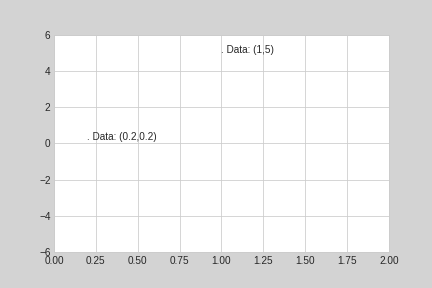

Text(0.2, 0.2, '. Data: (0.2,0.2)')

In [12]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0,10,0,10])

# transform=ax.transData is the default,
ax.text(1,5,". Data: (1,5)", transform=ax.transData)
ax.text(5,3,". Data: (2,1.5)", transform=ax.transData)
ax.text(0.2,0.2,". Data: (0.2,0.2)", transform=ax.transData)

<IPython.core.display.Javascript object>


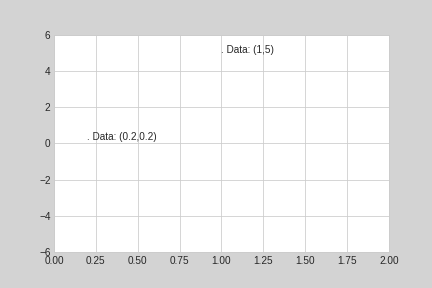

In [13]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

# Arrows and Annotation
Along with tick marks and text, another useful annotation mark is the simple arrow.
Drawing arrows in Matplotlib is often much harder than you might hope. While
there is a plt.arrow() function available, I wouldn’t suggest using it; the arrows it
creates are SVG objects that will be subject to the varying aspect ratio of your plots,
and the result is rarely what the user intended. Instead, I’d suggest using the plt.anno
tate() function. This function creates some text and an arrow, and the arrows can be
very flexibly specified.

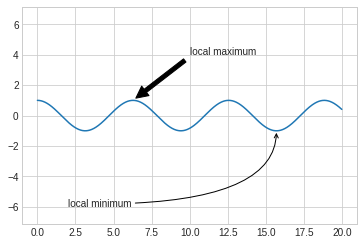

In [14]:
%matplotlib inline
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
arrowprops=dict(arrowstyle="->",
connectionstyle="angle3,angleA=0,angleB=-90"));

The arrow style is controlled through the arrowprops dictionary, which has numer‐
ous options available. These options are fairly well documented in Matplotlib’s online
documentation,

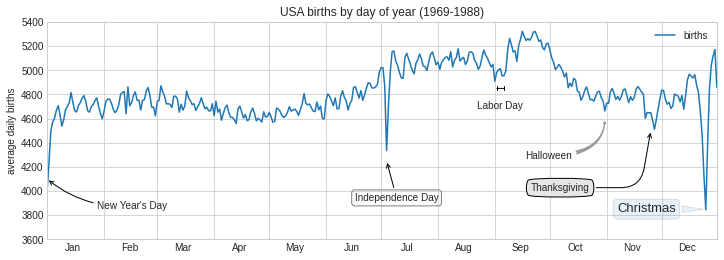

In [15]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
xytext=(50, -30), textcoords='offset points',
arrowprops=dict(arrowstyle="->",
connectionstyle="arc3,rad=-0.2"))
ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
bbox=dict(boxstyle="round", fc="none", ec="gray"),xytext=(10, -40), textcoords='offset points', ha='center',
arrowprops=dict(arrowstyle="->"))
ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
xycoords='data', textcoords='data',
arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })
ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',
xytext=(-80, -40), textcoords='offset points',
arrowprops=dict(arrowstyle="fancy",
fc="0.6", ec="none",
connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
xytext=(-120, -60), textcoords='offset points',
bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
arrowprops=dict(arrowstyle="->",
connectionstyle="angle,angleA=0,angleB=80,rad=20"))
ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',
xytext=(-30, 0), textcoords='offset points',
size=13, ha='right', va="center",
bbox=dict(boxstyle="round", alpha=0.1),
arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));
# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
ylabel='average daily births')
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
ax.set_ylim(3600, 5400);